<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [2]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [3]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [4]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)
df

,x,y,t
0,0.000000,0.000000,0.000000
1,3.629343,3.598794,0.085859
2,7.232105,7.110084,0.171717
3,10.808399,10.534245,0.257576
4,14.358340,13.871649,0.343434
...,...,...,...
95,240.425132,-1.673783,8.156566
96,241.976343,-4.916158,8.242424
97,243.509876,-8.216732,8.328283
98,245.025806,-11.575255,8.414141


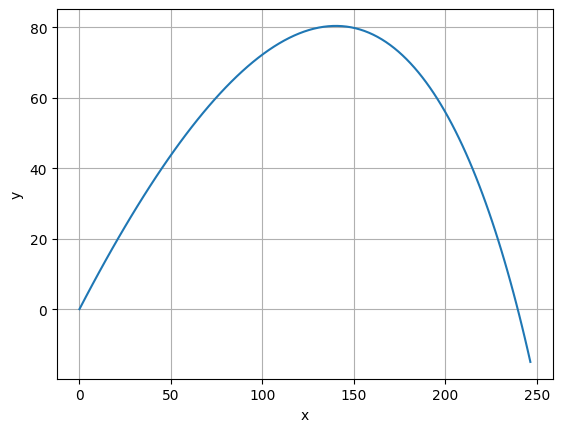

In [5]:
# Gràfica de la posición de x vs y
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

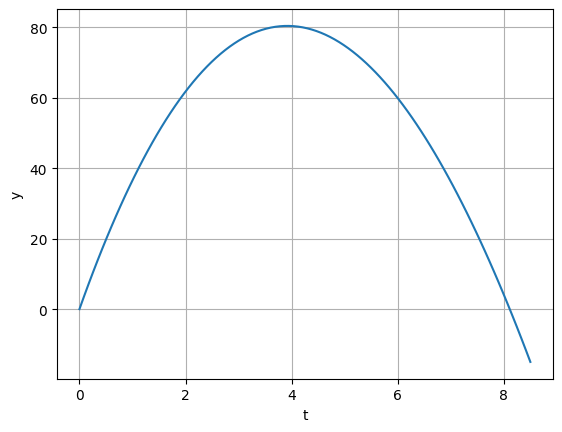

In [6]:
# Gráfica de la posición en y vs el tiempo
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [7]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [8]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [9]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [10]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [11]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

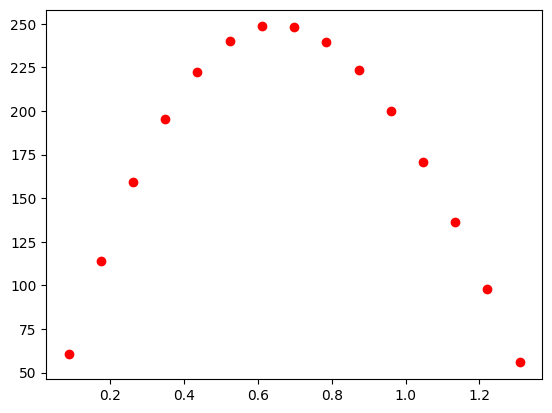

In [12]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

In [13]:
from scipy.interpolate import lagrange

interpolacion = lagrange(theta, Rmax)
print(interpolacion)

          14           13          12          11         10         9
0.002747 x  - 0.03536 x  + 0.2116 x  - 0.7555 x  + 1.629 x  - 1.311 x
          8         7         6         5         4         3         2
 - 4.521 x + 19.81 x - 33.31 x - 14.62 x + 234.8 x - 336.8 x - 412.3 x + 734.7 x - 3.759e-08


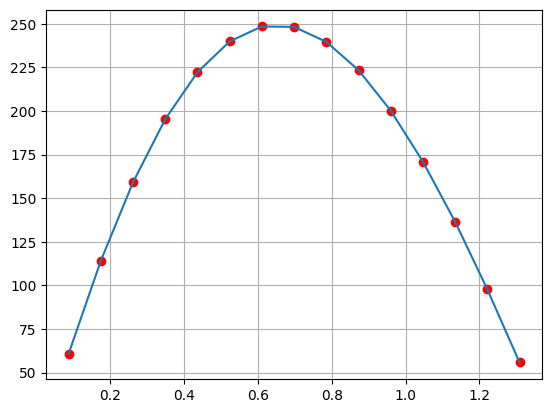

In [14]:
plt.figure()
plt.plot(theta,Rmax,"ro")
np.linspace(1,16)
plt.plot(theta, interpolacion(theta))
plt.grid()

In [15]:
from scipy import interpolate 
f = interpolate.interp1d( theta, Rmax, kind = 'cubic' )

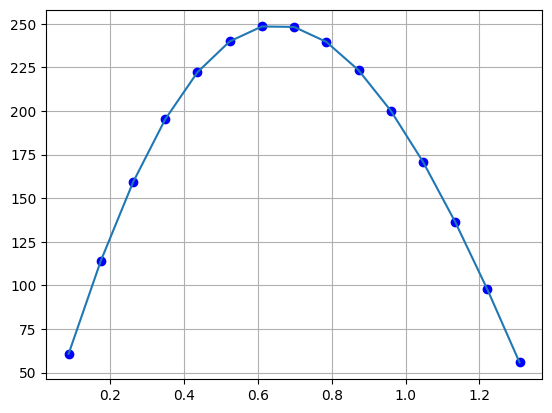

In [16]:
plt.figure()
plt.plot(theta, Rmax, "bo")
np.linspace(1, 16)
plt.plot(theta, f(theta))
plt.grid()




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


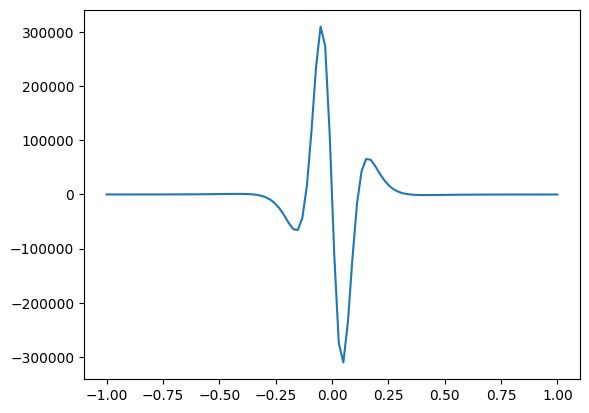

In [17]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [18]:
inter = lagrange(x_, f_s(x_))
print(inter)

            99             98             97             96
-1.304e+25 x  - 8.688e+28 x  + 3.513e+28 x  + 1.121e+30 x 
              95             94             93            92
 + 1.646e+30 x  - 2.288e+31 x  + 1.535e+32 x  - 1.57e+33 x 
              91            90             89             88
 + 1.169e+34 x  - 6.14e+34 x  + 2.506e+35 x  - 8.524e+35 x 
              87             86             85             84
 + 2.581e+36 x  - 7.498e+36 x  + 2.206e+37 x  - 6.541e+37 x 
              83             82             81           80
 + 1.861e+38 x  - 4.865e+38 x  + 1.143e+39 x  - 2.4e+39 x 
              79             78             77             76
 + 4.525e+39 x  - 7.725e+39 x  + 1.206e+40 x  - 1.737e+40 x 
              75             74             73             72
 + 2.328e+40 x  - 2.914e+40 x  + 3.412e+40 x  - 3.728e+40 x 
              71             70             69             68
 + 3.787e+40 x  - 3.567e+40 x  + 3.112e+40 x  - 2.527e+40 x 
              67            

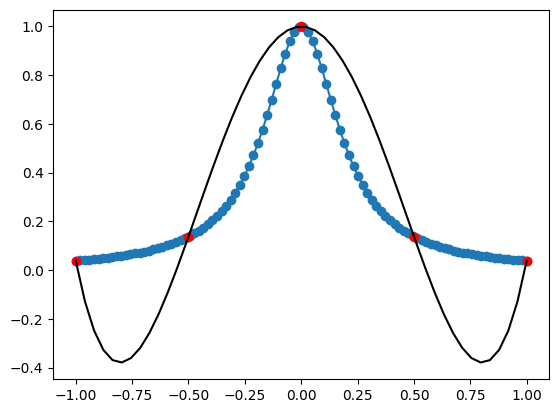

In [19]:
x = np.linspace(-1, 1, 100)

# Puntos a interpolar
n = 5
x_ = np.linspace(-1, 1, n)

# Lagrange
interpolate = lagrange(x_, f_s(x_))
xx = np.linspace(np.min(x_), np.max(x_))

# Gráfica
plt.figure()
plt.plot(x, f_s(x), "o-")
plt.plot(x_, f_s(x_), "ro")
plt.plot(xx, interpolate(xx), "k-")

In [20]:
def interpolacion(N):

  """
  n: numero de puntos 
  return: x y el polinomio de lagrange
  """

  n = N+1
  x_ = np.linspace(-1,1,n)

  interpolate = lagrange(x_,f_s(x_))

  #Valores de x con los que se grafica la interpolación
  x_p = np.linspace(np.min(x_),np.max(x_))
  return x_p, interpolate

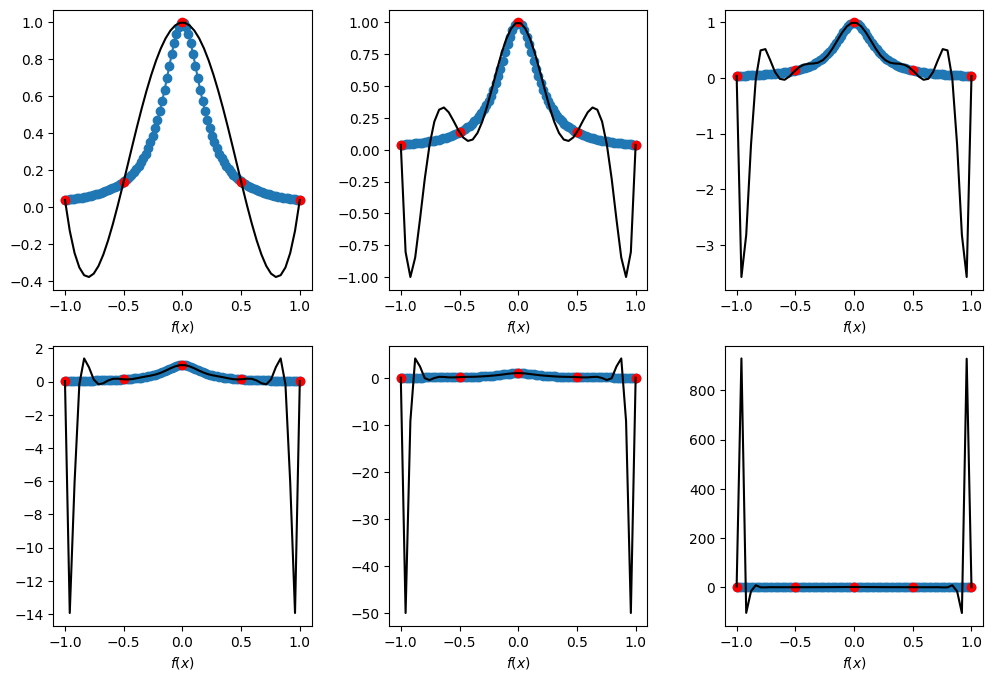

In [21]:
# Gráfica
NN=[4,8,12,16,20,30]

i=0
fig,axs=plt.subplots(figsize=(12,8),nrows=2,ncols=3)

for n_ in NN:
  ax=axs.flatten()
  ax[i].plot(x,f_s(x),'o-')
  ax[i].plot(x_,f_s(x_),'ro')
  
  N=n_
  xx,P=interpolacion(N)
  ax[i].plot(xx,P(xx),"k")
  ax[i].set_xlabel('$x$')
  ax[i].set_xlabel('$f(x)$')
  i=i+1

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.2)

In [22]:
N = 4
xx, P = interpolacion(N)

In [23]:
f_s = lambda x: 1/(1+25*x**2)
x = sp.symbols("x") 
f5 = sp.diff(f_s(x),x, N+1)
print(f5)
fxn5 = sp.lambdify(x,f5,'numpy')

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


280238.95743385755


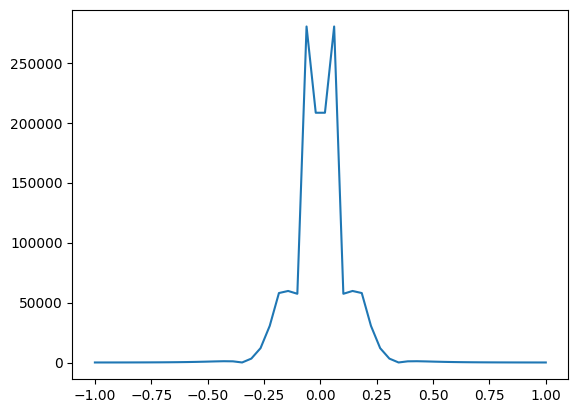

In [24]:
plt.plot(xx, abs(fxn5(xx)))
print(np.max(abs(fxn5(xx))))

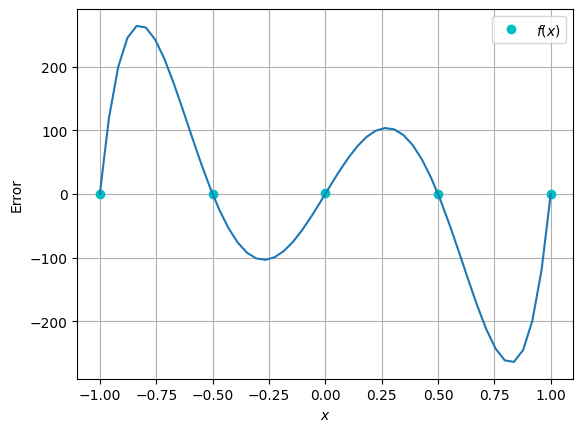

In [25]:
x_ = np.linspace(-1,1,N+1) #Puntos de interpolacion

import math as mt
plt.figure()
plt.plot(x_, f_s(x_), "co",label = "$f(x)$")
plt.plot(xx, 280238.95743385755*((xx-x_[0])*(xx-x_[1])*(xx-x_[2])*(xx-x_[3])*(xx-x_[4]))/mt.factorial(N+1))
plt.xlabel("$x$")
plt.ylabel("Error")
plt.legend()
plt.grid()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [26]:
from scipy import interpolate

# Definir función como objeto de sympy
x = sp.symbols('x')
def funt(x):
  return 1 / (1 + 25*x**2)

# Derivada de la función
fprima = sp.diff(funt(x), x)
fprima

   -50⋅x    
────────────
           2
⎛    2    ⎞ 
⎝25⋅x  + 1⎠ 

In [27]:
funt_ = sp.lambdify(x,funt(x), "numpy")
fprima_ = sp.lambdify(x, fprima,"numpy")
x_ = sp.lambdify(x, x, "numpy")

In [28]:
# Otra manera de calcular la interpolación de Hermite sin usar sympy

def fun(x):
  return 1 / (1 + 25*x**2)

def fp(x):
  x = np.asarray(x)
  return (-50*x) / (25*x**2 + 1)**2

In [29]:
xx = np.linspace(-1,1,5)

In [30]:
from scipy import interpolate
Hermite = interpolate.CubicHermiteSpline(xx, funt_(xx), fprima_(xx))

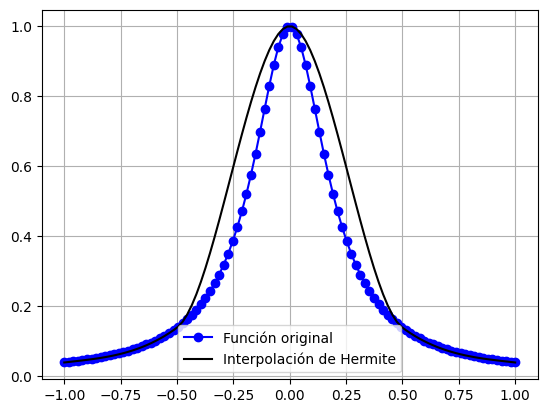

In [31]:
xx = np.linspace(-1, 1, 5)
funt0 = np.vectorize(funt_)
fprima0 = np.vectorize(fprima_)
Hermite = interpolate.CubicHermiteSpline(xx, funt_(xx), fprima_(xx))
x = np.linspace(-1, 1, 100)
y = funt_(x)
y_interp = Hermite(x)

plt.plot(x, y, 'bo-', label = 'Función original')
plt.plot(x, y_interp, 'k-', label = 'Interpolación de Hermite')
plt.legend()
plt.grid()

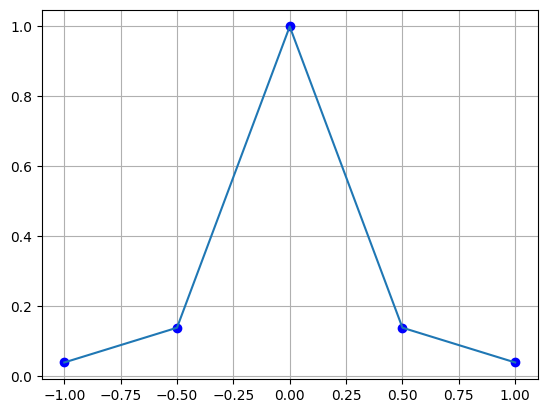

In [32]:
xx = np.linspace(-1,1,5)
plt.plot(xx, funt_(xx), "bo")
plt.plot(xx, Hermite(xx))
plt.grid()

In [33]:
def inter_hermite(N):

  """
  n: numero de puntos 
  return: x y el polinomio de lagrange
  """

  n = N+1
  x_ = np.linspace(-1,1,n)
  f_deriv = np.diff(fun(x))

  int_hermite = interpolate.CubicSplineHermite(x_,fun(x_), f_deriv(x_))

  #Valores de x con los que se grafica la interpolación
  x_p = np.linspace(np.min(x_),np.max(x_))
  return x_p, int_hermite

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [35]:
x0 = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
y0 = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

In [36]:
from scipy.interpolate import lagrange

paloma2 = lagrange(x0, y0)
print(paloma2)

            20             19             18             17
-3.075e-11 x  + 4.279e-09 x  - 2.773e-07 x  + 1.111e-05 x 
              16            15           14         13         12
 - 0.0003082 x  + 0.006286 x  - 0.09769 x  + 1.183 x  - 11.32 x 
          11         10        9        8             7             6
 + 86.25 x  - 525.8 x  + 2564 x - 9969 x + 3.068e+04 x - 7.387e+04 x
              5             4           3             2
 + 1.368e+05 x - 1.899e+05 x + 1.9e+05 x - 1.287e+05 x + 5.246e+04 x - 9653


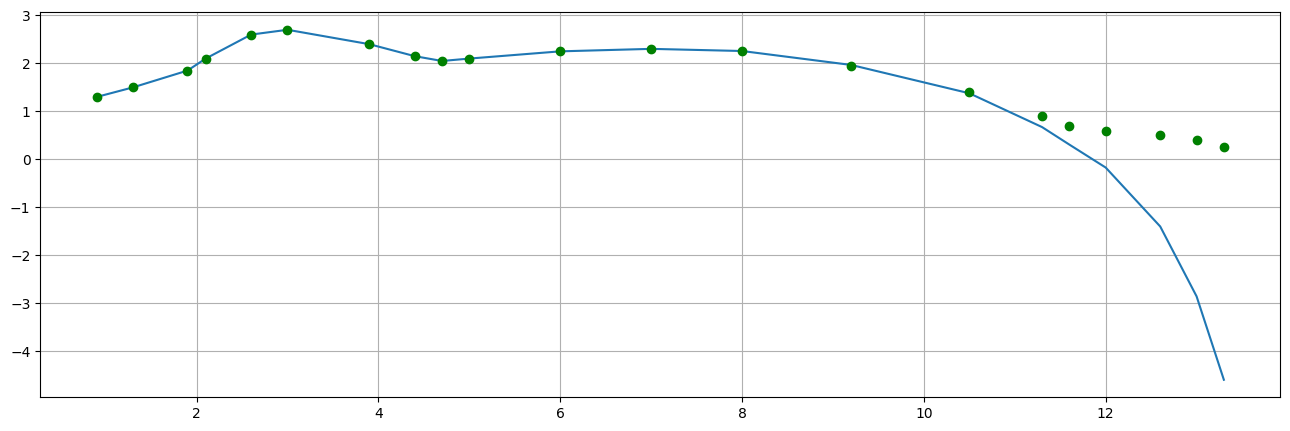

In [37]:
# Gráfica de interpolación de los puntos de la paloma con Lagrange

plt.figure(figsize = (16, 5))
x = np.linspace(np.min(x0), np.max(x0))
plt.plot(x0, paloma2(x0))
plt.plot(x0, y0, "go")
plt.grid()

In [38]:
from scipy.interpolate import CubicSpline

paloma = CubicSpline(x0, y0)
print(paloma)

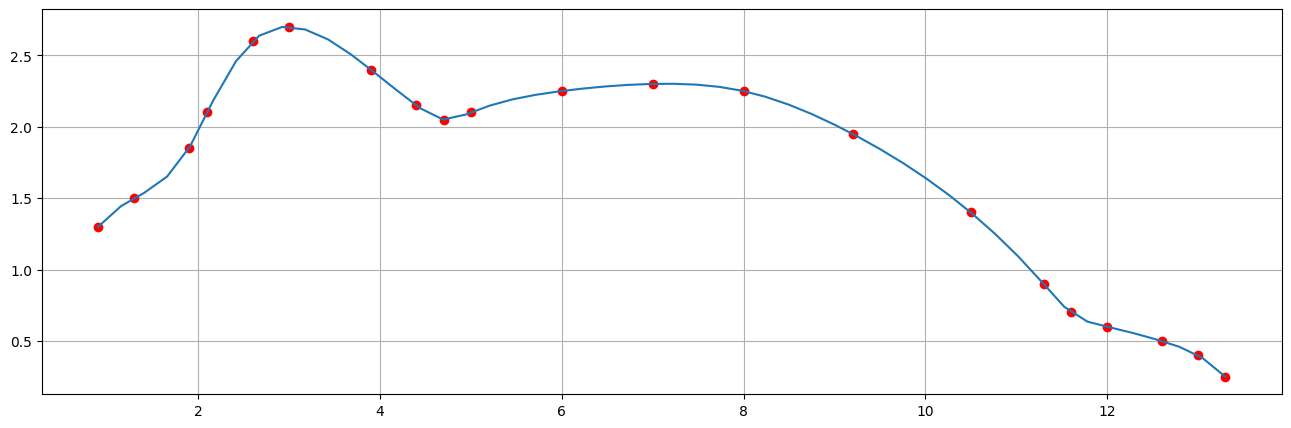

In [39]:
# Gráfica de interpolación de los puntos de la paloma con CubicSpline

plt.figure(figsize = (16, 5))
plt.plot(x0, y0, "ro")
x = np.linspace(np.min(x), np.max(x))
plt.plot(x, paloma(x))
plt.grid()

**Comparación de resultados:** La interpolación de Hermite es mucho más precisa que la de Lagrange, en la interpolación de Hermite se da más información, se especifican tanto los valores de la función como las derivadas en esos puntos. Se podría decir que Hermite es una generalización del método de la Lagrange, es mucho más útil usar Hermite porque se tiene más información sobre la tasa de cambio entre los puntos a interpolar (esto implica también la solución de sistema de ecuaciones mucho más complejos). 

# 5. Ejercicios de Repaso

En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


e. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

In [53]:
''' Magnetización reducida por el método de la secante '''

# Importar librerías
import math
from scipy.optimize import root_scalar
from scipy.optimize import bisect

def fun(m):
  return np.tanh(m/0.5) - m

raices = root_scalar(fun, method = 'secant', x0 = 0.5, x1 = 1.1)
print("El cero de la función es", round(raices.root, 4))

El cero de la función es 0.9575


In [62]:
# Para encontrar las demás raices usamos el método de bisección

raices2 = bisect(fun, -1.5, -0.5, xtol=2e-12)
print('el primer cero se encuentra en:', round(raices2,4))

raices3 = bisect(fun, -0.5, 0.5, xtol=2e-12)
print('el segundo cero se encuentra en:', round(raices3,4))

el primer cero se encuentra en: -0.9575
el segundo cero se encuentra en: 0.0


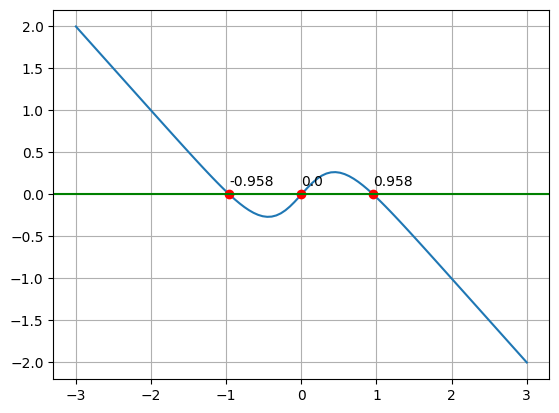

In [63]:
raices = round(raices.root, 4)

m = np.linspace(-3, 3, 100)
plt.plot(m, fun(m))
plt.plot(raices, 0, "ro")
plt.text(raices, 0.1, f"{raices:.3}")
plt.plot(raices2, 0, "ro")
plt.text(raices2, 0.1, f"{raices2:.3}")
plt.plot(raices3, 0, "ro")
plt.text(raices3, 0.1, f"{raices3:.3}")
plt.grid()
plt.axhline(y=0, color = 'green')

In [75]:
''' Magnetización reducida por el método de punto fijo '''

from scipy.optimize import fixed_point

def g(m):
  return m-fun(m)

cero = fixed_point(g, 1)
print("Por el método de punto fijo el cero es", cero)

Por el método de punto fijo el cero es 0.9575040240772688


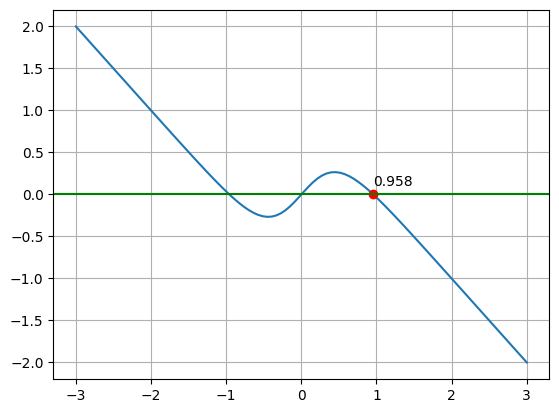

In [76]:
m = np.linspace(-3, 3, 100)
plt.plot(m, fun(m))
plt.plot(cero, 0, "ro")
plt.text(cero, 0.1, f"{cero:.3}")
plt.grid()
plt.axhline(y=0, color = 'green')

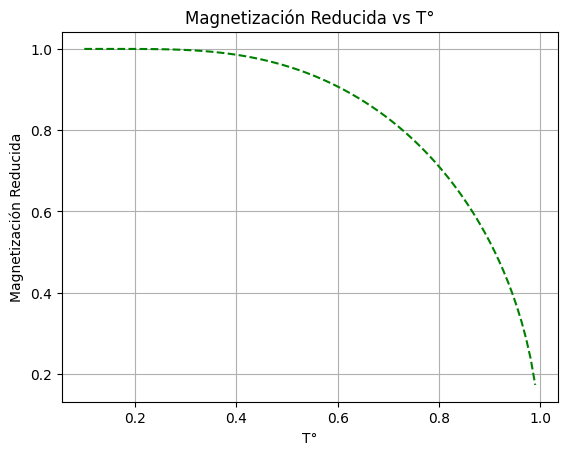

In [77]:
def reduc(x_0, T):
    x = newton(lambda x: x - np.tanh(x/T), x_0)
    return x

T = np.linspace(0.1, 0.99, 100)
r_mag = [reduc(0.5, t) for t in T]

plt.plot(T, r_mag, "g--")
plt.xlabel('T°')
plt.ylabel('Magnetización Reducida')
plt.title('Magnetización Reducida vs T°')
plt.grid()
plt.show()

In [78]:
# Lagrange 

from scipy.interpolate import lagrange

l = lagrange(T, r_mag)
print(l)

           99             98             97             96
-8.25e+61 x  + 4.509e+63 x  - 1.182e+65 x  + 2.079e+66 x 
              95             94             93             92
 - 2.687e+67 x  + 2.802e+68 x  - 2.366e+69 x  + 1.675e+70 x 
              91             90           89             88
 - 1.032e+71 x  + 5.618e+71 x  - 2.7e+72 x  + 1.164e+73 x 
              87            86             85             84
 - 4.527e+73 x  + 1.59e+74 x  - 5.169e+74 x  + 1.558e+75 x 
              83             82             81             80
 - 4.296e+75 x  + 1.104e+76 x  - 2.621e+76 x  + 5.829e+76 x 
              79             78             77             76
 - 1.216e+77 x  + 2.392e+77 x  - 4.425e+77 x  + 7.525e+77 x 
              75             74            73             72
 - 1.227e+78 x  + 1.857e+78 x  - 2.71e+78 x  + 3.772e+78 x 
              71             70             69             68
 - 4.906e+78 x  + 6.157e+78 x  - 7.246e+78 x  + 8.168e+78 x 
              67           66 

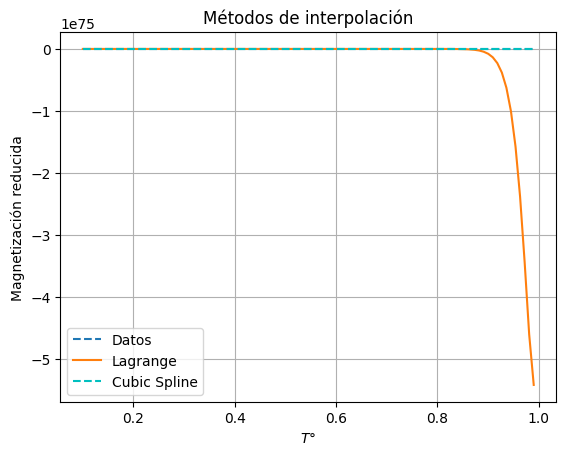

In [86]:
# Interpolación por Cubic Spline
cubic = CubicSpline(T, r_mag)

# Grafica de las interpolaciones
plt.plot(T, r_mag, '--', label ='Datos')
plt.plot(T, l(T), label='Lagrange')
plt.plot(T, cubic(T), 'c--', label='Cubic Spline')
plt.xlabel('$T°$')
#plt.ylim(0.2,1.2)
plt.ylabel('Magnetización reducida')
plt.title('Métodos de interpolación')
plt.grid()
plt.legend()
plt.show()